In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
from sklearn.datasets import load_iris

In [3]:
df=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
df["target"]=pd.DataFrame(load_iris().target)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

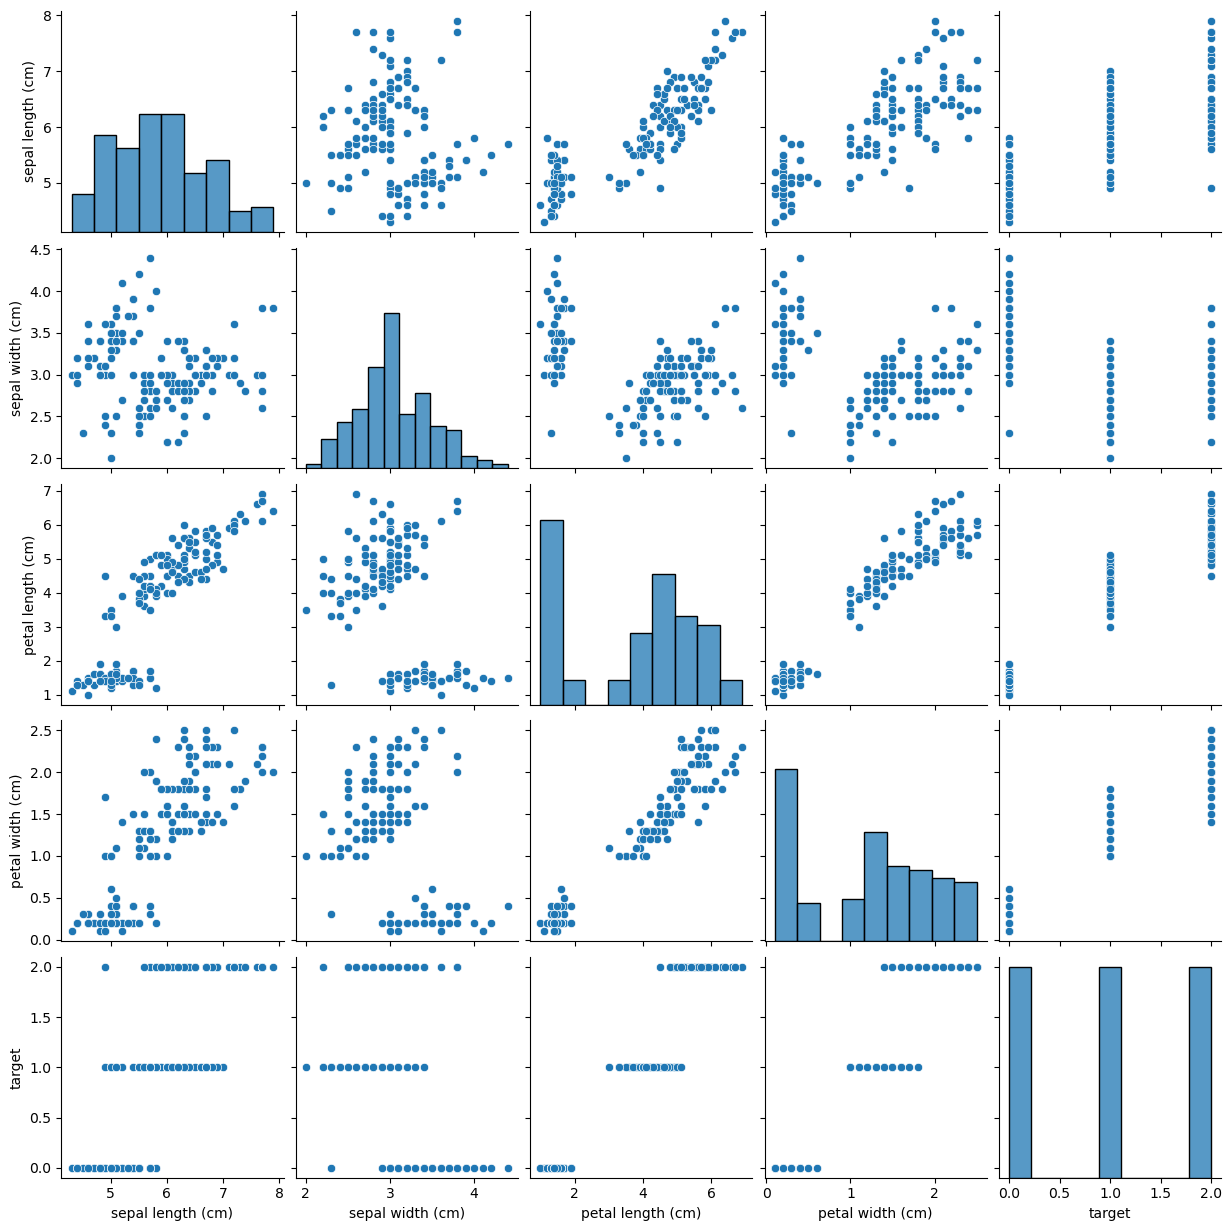

In [6]:
sns.pairplot(df)
plt.show()

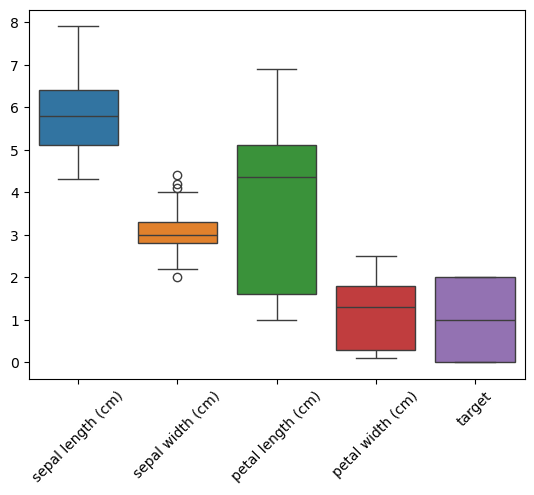

In [7]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [8]:
relation=df.corr()
relation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


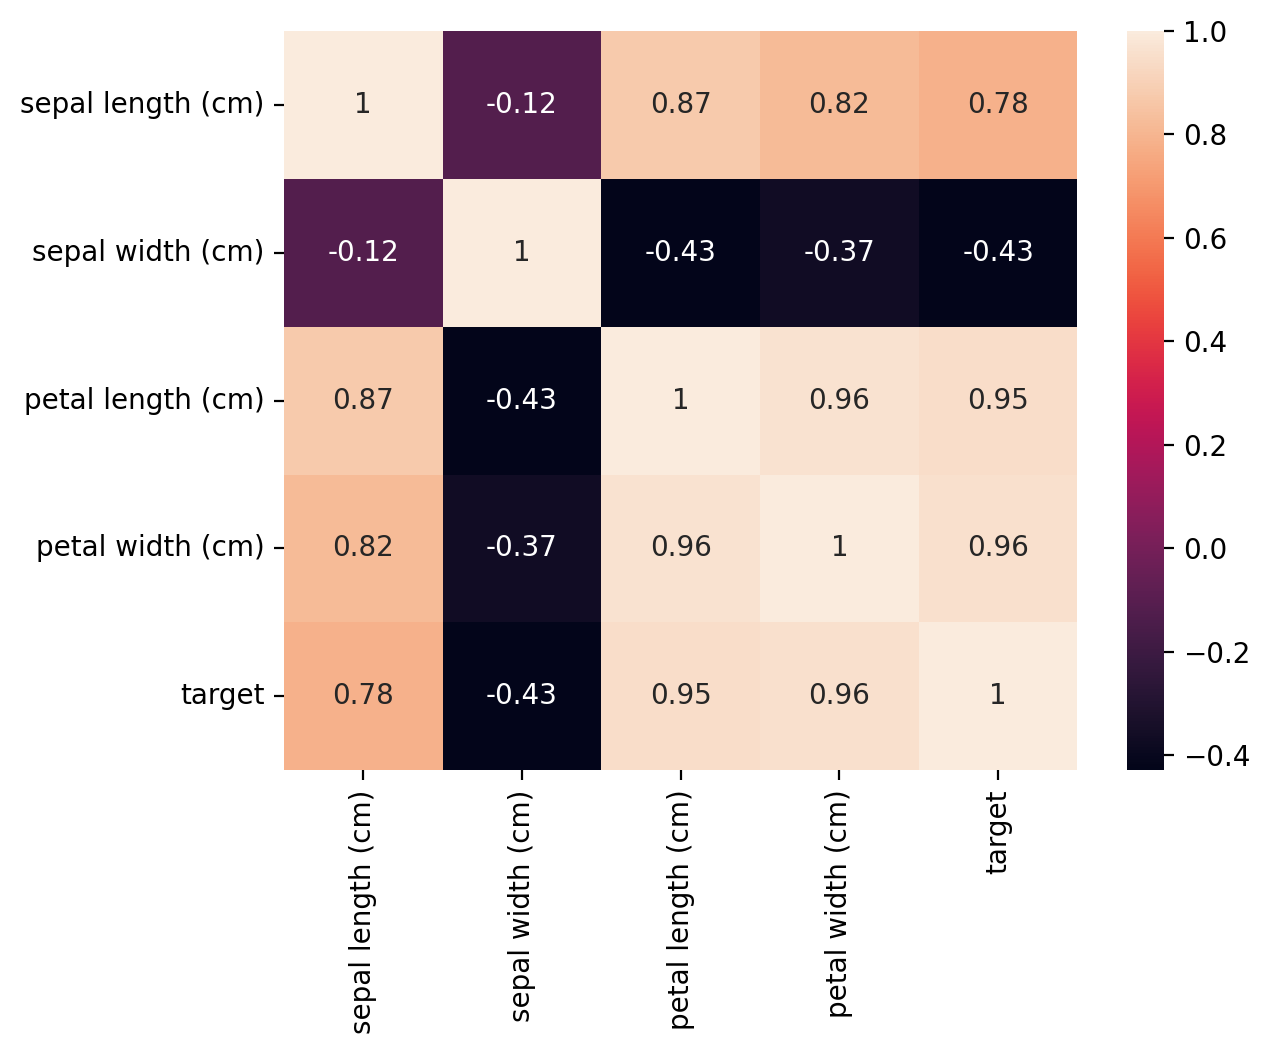

In [9]:
fig=plt.figure(dpi=200)
sns.heatmap(relation,annot=True)
plt.show()

In [10]:
y=df.pop("target")
x=df

In [11]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [12]:
y.head(2)

0    0
1    0
Name: target, dtype: int32

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

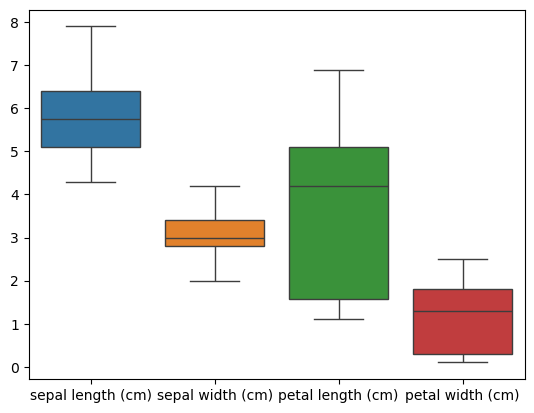

In [14]:
sns.boxplot(x_train)
plt.show()

In [15]:
for i in x_train:
    skew=x_train[i].skew().round()
    if skew==0:
        mean=x_train[i].mean()
        std=x_train[i].std()
        lower=mean-3*std
        upper=mean+3*std
    else:
        q1,q3=x_train[i].quartile([0.25,0.75])
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q1+1.5*iqr
    x_train[i]=x_train[i].clip(lower=lower,upper=upper)

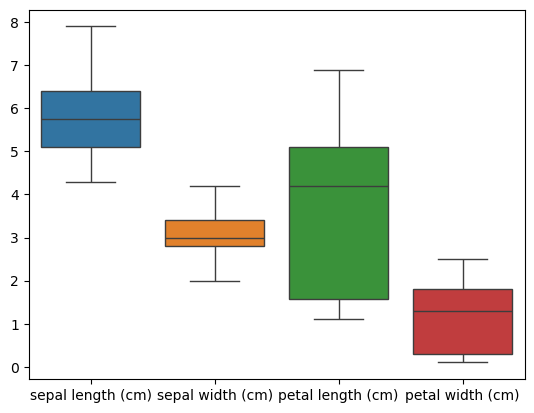

In [16]:
sns.boxplot(x_train)
plt.show()

In [17]:
pipeline=Imbpipeline([("featureselection",SelectKBest(k=3)),
                      ("scale",StandardScaler()),
                      ("pca",PCA()),
                     ("model",LogisticRegression())])


In [18]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('featureselection', SelectKBest(k=3)),
                ('scale', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [19]:
y_pred=pipeline.predict(x_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [21]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(pipeline,x_train,y_train,cv=10)
score.mean()

0.9583333333333334

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(pipeline,x_test,y_test,cv=10)
score.mean()

C:\Users\gopal\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


0.9333333333333332

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(pipeline,x,y,cv=10)
score.mean()

0.96

In [26]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],        # Regularization strength
#     'log_reg__penalty': ['l2', 'l1', 'none'],              # Regularization type
#     'log_reg__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Solvers to use
#     'log_reg__max_iter': [100, 200, 500],                  # Maximum number of iterations for convergence
#     'log_reg__tol': [1e-4, 1e-3]                           # Tolerance for stopping criteria
# }
# grid_search=GridSearchCV(clf,param_grid,cv=5)
# grid_search.fit(x_train,y_train)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

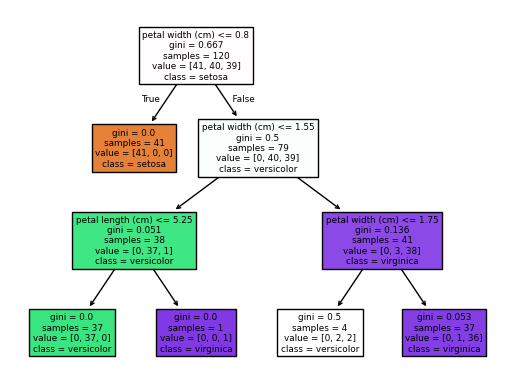

In [28]:
tree.plot_tree(clf,filled=True,max_depth=6,feature_names=df.columns.tolist(),class_names=load_iris().target_names)
plt.show()

In [29]:
y_pred=clf.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [31]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,x_train,y_train,cv=5)
score.mean()

0.9666666666666668

In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,x_test,y_test,cv=5)
score.mean()

1.0

In [35]:
score=cross_val_score(clf,x,y,cv=5)
score.mean()

0.96

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":[2,3,4,5,6],
            "min_samples_split":[2,3,4,5],
           "min_samples_leaf":[1,2,3,4]}
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [37]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [38]:
best=grid_search.best_estimator_

In [39]:
best.score(x_test,y_test)

0.9333333333333333

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=forest.predict(x_test)

In [42]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [43]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  9]], dtype=int64)

In [44]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [45]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,x,y,cv=10)
score.mean()

0.96

In [46]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,x_train,y_train,cv=10)
score.mean()

0.9583333333333334

In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,x_test,y_test,cv=10)
score.mean()

C:\Users\gopal\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


1.0

In [48]:
import joblib
joblib.dump(forest,"forest.pkl")

['forest.pkl']

In [49]:
forest=joblib.load("forest.pkl")

In [50]:
y_pred=forest.predict(x_test)

In [51]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid={"n_estimators":[100,200,300],"max_depth":[None,10,20],"max_features":[2,5,10]}
grid_search=GridSearchCV(forest,param_grid=param_grid,cv=5)

In [77]:
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(max_features=2)

In [79]:
grid_search.best_params_

{'max_depth': None, 'max_features': 2, 'n_estimators': 100}

In [81]:
grid_search.best_score_

0.9583333333333333